In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

## Regression

In [2]:
df = pd.read_csv("../Datasets/sales_all.csv")

In [3]:
df

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,True,True,117.0
1,2012-01-02,0,Mon,False,True,106.0
2,2012-01-03,1,Tue,False,True,82.0
3,2012-01-04,2,Wed,False,True,70.0
4,2012-01-05,3,Thur,False,True,84.0
...,...,...,...,...,...,...
1918,2017-04-02,6,Sun,False,False,107.0
1919,2017-04-03,0,Mon,False,False,113.0
1920,2017-04-04,1,Tue,False,False,87.0
1921,2017-04-05,2,Wed,False,False,69.0


In [4]:
X = pd.get_dummies(df.iloc[:,:-1])
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split ##Wichtigster Schritt für Evaluierung

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

### Mit Train-/Test- Split

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

lr.score(X_test,y_test) ## R2 Score keine Accuracy (Wie gut beschreibt das Modell die Varianz der Daten)

0.9422277708913509

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(lr.predict(X_test),y_test)

In [8]:
import math
math.sqrt(mse) #durchscnittle Abweichung --> root mean squared error

3.806439128973022

### Ohne Train-/Test- Split

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X,y)

lr.score(X,y) ## R2 Score keine Accuracy (Wie gut beschreibt das Modell die Varianz der Daten)

1.0

In [10]:
### Hohe Modellperformance wird angezeigt, jedoch sind die Daten auf denen getestet wird nur bekannte Daten --> Echte Performance verborgen

## Klassifikation

In [11]:
df = sns.load_dataset("mpg")

In [12]:
df.origin = df.origin.map({"usa":"usa","europe":"non-usa","japan":"non-usa"})

In [13]:
df.horsepower = df.horsepower.fillna(df.horsepower.mean())

In [14]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,non-usa,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [15]:
X = df.iloc[:,:-2]

In [16]:
y = df.iloc[:,-2]

In [17]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

params= {
    "max_depth": range(1,10,1)
}

search = GridSearchCV(clf,params,cv=5) ## 5-fold-Cross-Validation

search.fit(X_train,y_train)

search.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [19]:
search.score(X_test,y_test) ## Accuracy gibt zu wenig Aufschluss, wie gut welche Daten predicted werden

0.8875

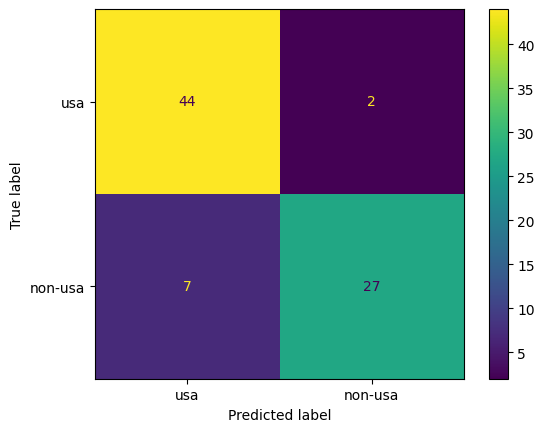

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(search.best_estimator_, X_test, y_test,labels=["usa","non-usa"])

In [24]:
from sklearn.metrics import f1_score,recall_score,precision_score

In [25]:
f1_score(y_test, search.predict(X_test),average="binary", pos_label="usa") ## f1_score gibt an wieviele true labels Verhältnismäßig falsch predicted werden

0.9072164948453608

In [26]:
recall_score(y_test, search.predict(X_test),average="binary", pos_label="usa")

0.9565217391304348

In [27]:
(42)/ (42+5)

0.8936170212765957

In [28]:
precision_score(y_test, search.predict(X_test),average="binary", pos_label="usa")

0.8627450980392157

In [29]:
(42)/(42+8)

0.84

## Clustering

In [30]:
df = sns.load_dataset("iris")

In [31]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
X = df.iloc[:,:-1]

In [33]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

score = []
k = []

for i in range(2,12,1):
    cluster = KMeans(i, n_init="auto")
    cluster.fit(X)
    score.append(davies_bouldin_score(X,cluster.labels_))
    k.append(i)
    
elbow = pd.DataFrame({"score":score,"k":k})

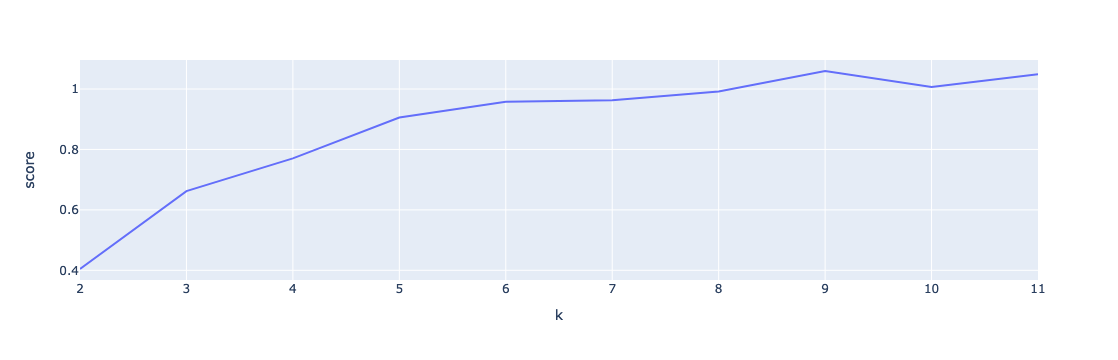

In [40]:
px.line(elbow, x="k",y="score")

In [41]:
cluster = KMeans(2, n_init="auto")
cluster.fit(X)

df['pred_labels'] = cluster.labels_

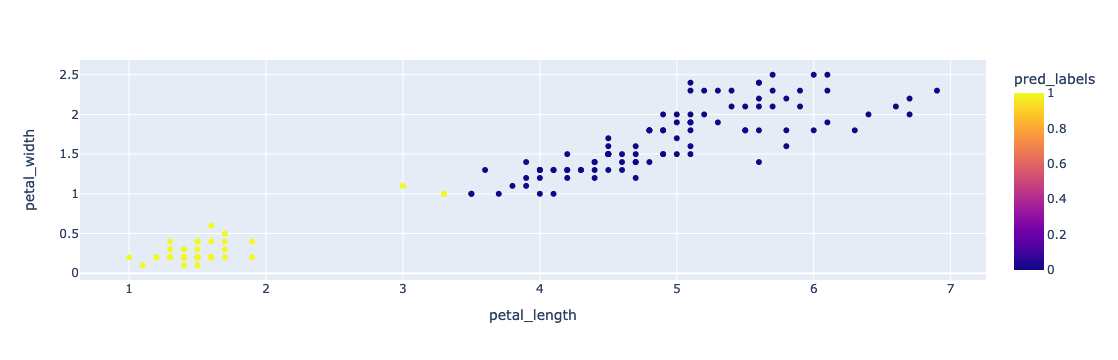

In [42]:
px.scatter(df,x="petal_length",y="petal_width", color="pred_labels")

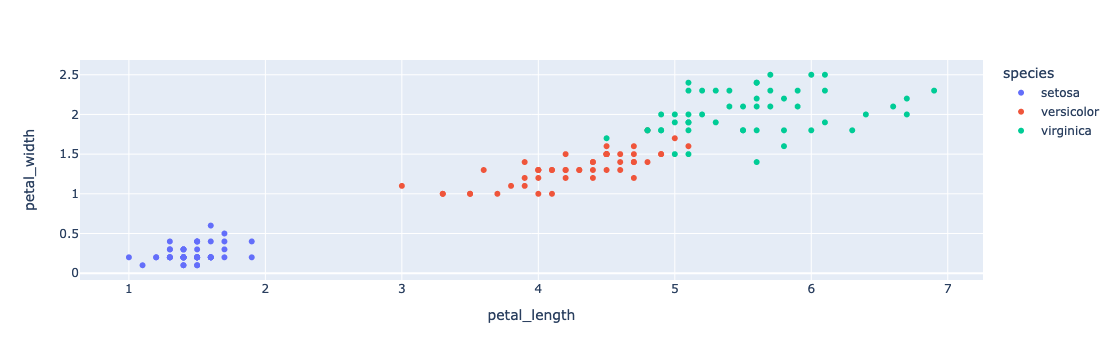

In [43]:
px.scatter(df,x="petal_length",y="petal_width", color="species")